<a href="https://colab.research.google.com/github/askot19/Analise_de_dados/blob/main/Projetos%20de%20Ci%C3%AAncia%20de%20Dados%20com%20Python/Cap%C3%ADtulo%201/ex108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## **Data Scientist & Analyst**

*by [Paulo Henrique de Melo Ferreira](https://www.linkedin.com/in/paulo-henrique-ferreira-20151374/)*

---

<p style="text-align: justify;">

Este notebook visa aprofundar meus conhecimentos práticos em Ciência de Dados. Meu objetivo aqui é implementar o que já conheço da linguagem Python e desenvolver projetos completos acerca da área. Como bibliografia básica utlizarei o **Projetos de Ciência de Dados com Python - Stephen Klosterman**, que visa tratar dados desde o tipo de a análise mais simples (exploratória de dados) até aplicações envolvendo modelos preditivos e Machine Learning. As ferramentas que utilizarei serão principalmente o **Colaboratory do Google** e o **Jupyter Notebook - Anaconda**. O intuito aqui é consumir toda a literatura e me inserir do dia-a-dia de um profissional de dados, atuando tanto como Cientista quanto como Analista de Dados. Pretendo me tornar um profissional mais qualificado após estes desenvolvimentos.
</p>

---

# 1. Exploração e Limpeza de Dados

#### Objetivos

Neste primeiro capítulo serão dados os primeiros passos com Python para ciência de dados, após a conclusão dele serei capaz de lidar com dados tabulares em Python, realizar análise exploratória de dados, Garantir a qualidade dos dados que estou utilizando e realizar a limpeza dos dados.

## Características do Dataset

* `ID`: Código de identificação da conta
* `LIMIT_BAL`: Valor do Crédito fornecido (em novos dólares taiwaneses (NT)) inclusive o crédito do consumidor individual e familiar (complementar).
* `SEX`: Gênero (1 = masculino; 2 = feminino).
* `EDUCATION`: Instrução (1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 = outros).
* `MARRIAGE`: Estado civil (1 = casado; 2 = solteiro; 3 = outros).
* `AGE`: Idade (ano).
* `PAY_1-PAY_6`: Registro de pagamentos passados. Pagamentos mensais passados, registrados de setembro a abril. Ex.: PAY_1 representa o status de reembolso em setembro; PAY_2 representa o status de reembolso em agosto, e a assim por diante. Os registros são armazenados da seguinte maneira -2 significa que a conta começou o mês com o saldo zerado e nunca foi usado crédito algum; -1 = conta teve pagamento integral do valor devido; 0 significa que ao menos foi realizado o pagamento mínimo, mas não foi paga a fatura integral (o saldo restante foi carregado para o mês seguinte); 1 = atraso de um mês de pagamento; 2 = atraso de dois meses de pagamento até chegar em 9 = atraso de nove meses ou mais no pagamento.
* `BILL_AMT1-BILL_AMT6`: Valor da fatura (em novos dólares taiwaneses). BILL_ATM1 representa o valor da fatura em setembro; BILL_AMT2 representa o valor da fatura em agosto; e assim por diante até BILL_AMT6, que representa o valor da fatura em abril.
* `PAY_AMT1-PAY_AMT6`: Valor de pagamentos anteriores (novos dólares taiwaneses). PAY_AMT1 representa o valor pago em setembro; PAY_AMT2 representa o valor pago em agosto; e assim por diante até PAY_AMT6, que representa o valor pago em abril.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt #pacote de gráficos
#Renderização automática
%matplotlib inline
import matplotlib as mpl #Funções gráficas adicionais
mpl.rcParams['figure.dpi'] = 100 #Resolução de 100dpi para as imagens
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/askot19/Analise_de_dados/main/Projetos%20de%20Ci%C3%AAncia%20de%20Dados%20com%20Python/Cap%C3%ADtulo%201/Chapter_1_cleaned_data.csv')

In [4]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [5]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [6]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

<Axes: >

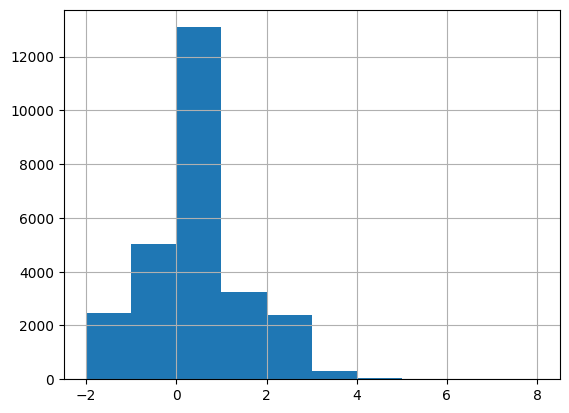

In [7]:
df[pay_feats[0]].hist()